In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from hmmlearn import hmm
import numpy as np

In [2]:
N_regimes = 3
start_time = None

In [3]:
kor = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) #인덱스 불러오기
usa = pd.read_csv('Composite leading indicator.csv', index_col=0, parse_dates=True )
kororign = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) 

In [4]:
#normalize
kor['value'] =( kor['value'] - kor['value'].mean() ) / kor['value'].std()
usa['value'] =( usa['value'] - usa['value'].mean() ) / usa['value'].std()
print(kor)
print(usa)

               value
time                
1990-01-01  0.094932
1990-02-01  0.023641
1990-03-01 -0.013528
1990-04-01 -0.047739
1990-05-01 -0.097300
...              ...
2022-02-01 -0.149391
2022-03-01 -0.268033
2022-04-01 -0.386924
2022-05-01 -0.506175
2022-06-01 -0.630544

[390 rows x 1 columns]
               value
time                
1955-01-01  0.992076
1955-02-01  1.228729
1955-03-01  1.424447
1955-04-01  1.561836
1955-05-01  1.640568
...              ...
2022-02-01 -0.023885
2022-03-01 -0.115048
2022-04-01 -0.210998
2022-05-01 -0.313676
2022-06-01 -0.416662

[810 rows x 1 columns]


<AxesSubplot:title={'center':'USA Leading indicator'}, xlabel='time'>

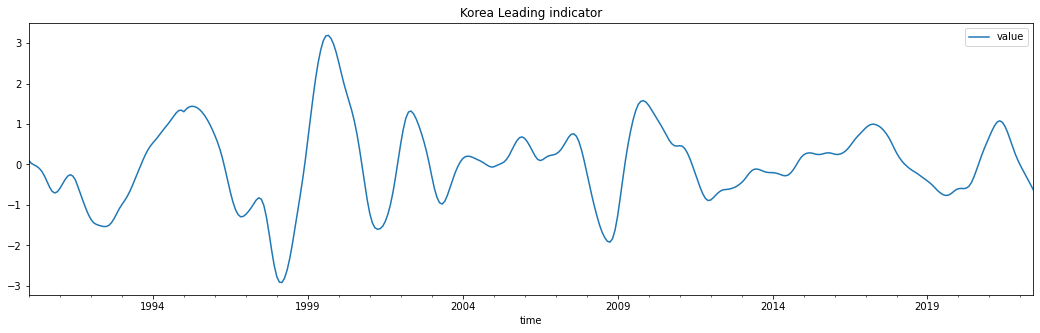

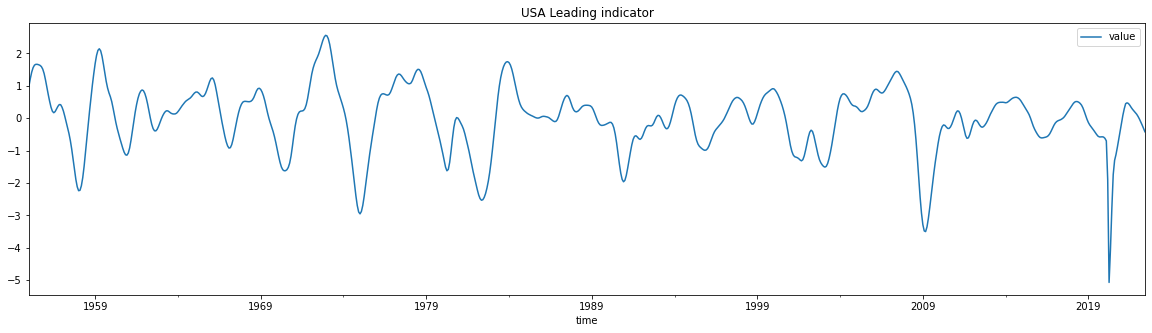

In [5]:
kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 
usa.plot(title='USA Leading indicator', figsize=(20, 5)) 

In [6]:
adfuller(kor.dropna())
adfuller(usa.dropna())

(-7.904352680785564,
 4.104480374022514e-12,
 5,
 804,
 {'1%': -3.4385095783477877,
  '5%': -2.865141527500859,
  '10%': -2.5686877783346946},
 -705.0588007416275)

In [7]:
#Korea 부터

In [8]:
#kor_model = sm.tsa.MarkovRegression(kor.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
kor_model = sm.tsa.MarkovRegression(kor.dropna(),
                                    k_regimes=N_regimes, trend='ct', switching_trend=True, switching_variance=True)
kor_model_fit = kor_model.fit()
#kor_model_fit.summary()



C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


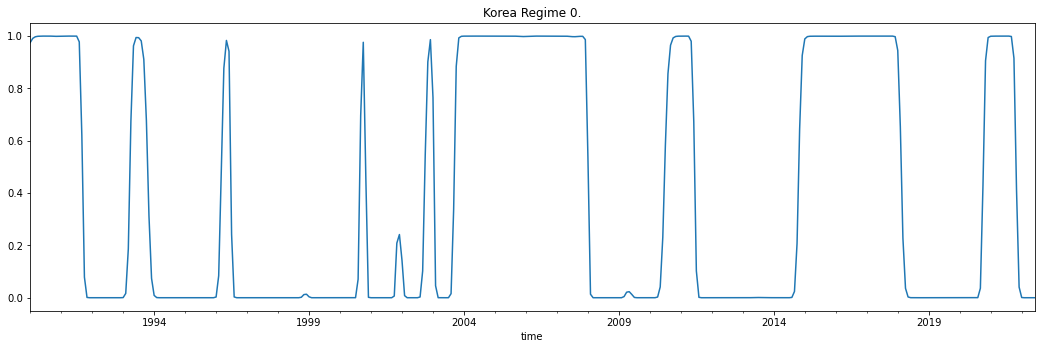

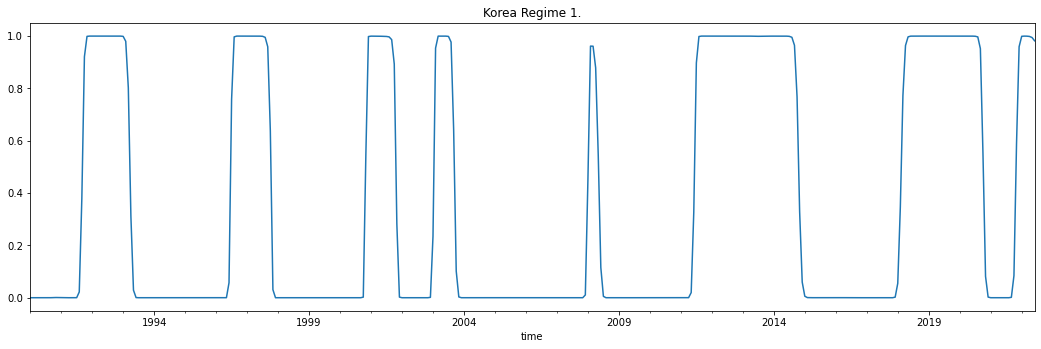

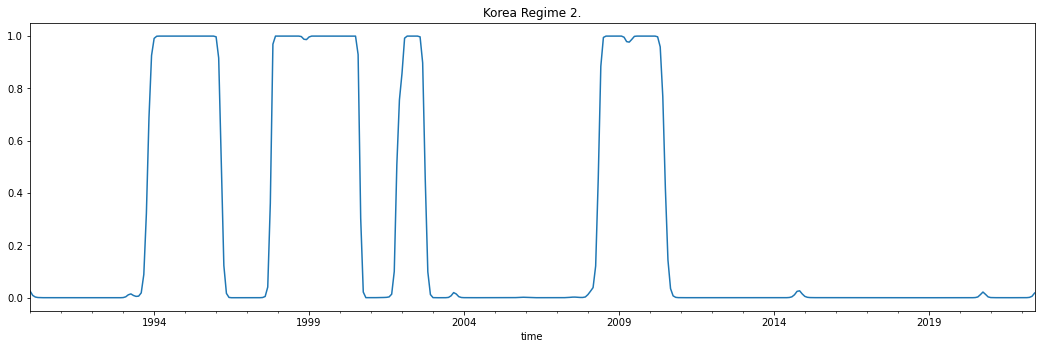

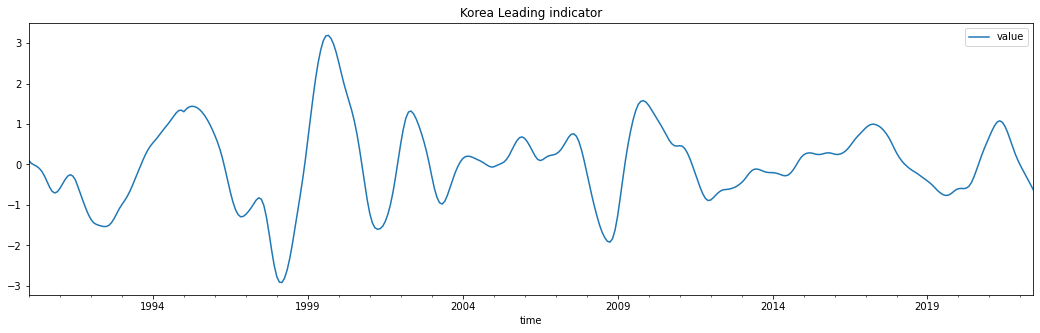

In [9]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)                # nrows=2, ncols=1, 
    kor_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Regime {}.'.format(i), figsize=(18, 18))
    kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

In [10]:
model2 = hmm.GaussianHMM(n_components=3, n_iter=1000).fit(kor.dropna())
model2.decode(kor.dropna())[1]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
indexdf = pd.DataFrame(kor.index)
preddftemp = pd.DataFrame([model2.decode(kor.dropna())[1]])

preddftemp=preddftemp.T
preddftempfin=pd.concat([preddftemp, indexdf], axis=1)
preddftempfin = preddftempfin.set_index('time')
preddftempfin


,0
time,
1990-01-01,1
1990-02-01,1
1990-03-01,1
1990-04-01,1
1990-05-01,1
...,...
2022-02-01,1
2022-03-01,1
2022-04-01,0


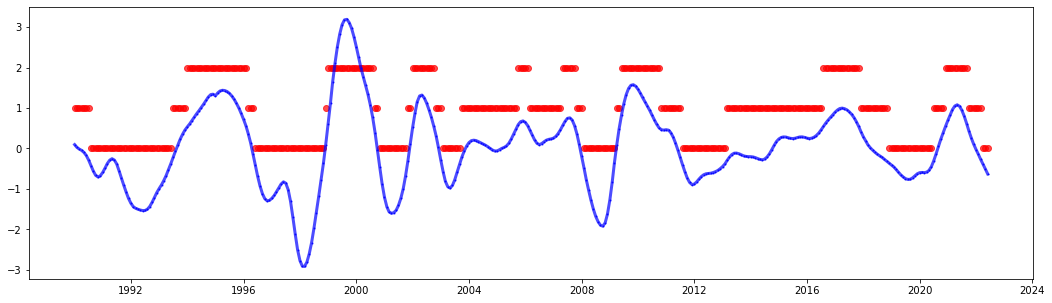

In [12]:
plt.figure(figsize=(18,5))
plt.plot(kor.index, kor['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.7)
plt.scatter(kor.index, preddftempfin, alpha=0.7, linewidth=1, color='red')
plt.show()

In [13]:

copykororign=pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) 

In [14]:
model_originstock = hmm.GaussianHMM(n_components=2, n_iter=1000, covariance_type="full").fit(kororign.dropna())
#must be one of ‘spherical’, ‘tied’, ‘diag’, ‘ full’.
model_originstock.decode(kororign.dropna())[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

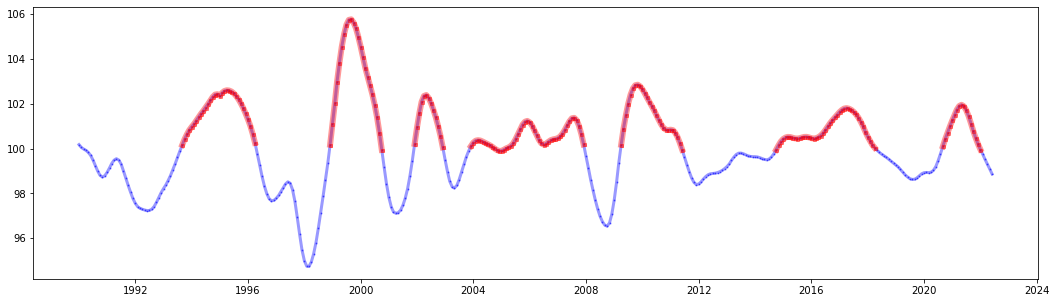

In [15]:
indexdf_o = pd.DataFrame(kororign.index)
preddftemp_o = pd.DataFrame([model_originstock.decode(kororign.dropna())[1]])

preddftemp_o=preddftemp_o.T
preddftempfin_o=pd.concat([preddftemp_o, indexdf], axis=1)
preddftempfin_o = preddftempfin_o.set_index('time')

for i in range(len(kor.index)):
    if preddftempfin_o.iloc[i, 0] == 1:
        kororign.iloc[i, 0] = np.nan
        
plt.figure(figsize=(18,5))
plt.plot(kor.index, copykororign['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.4)
plt.plot(kor.index, kororign['value'], '-s', color='r', markersize=3, linewidth=6, alpha=0.4)

plt.show()

In [16]:
usa_model = sm.tsa.MarkovRegression(usa.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
usa_model_fit = usa_model.fit()
usa_model_fit.summary()


C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  value   No. Observations:                  810
Model:               MarkovRegression   Log Likelihood                -887.382
Date:                Thu, 28 Jul 2022   AIC                           1792.763
Time:                        03:07:42   BIC                           1835.037
Sample:                    01-01-1955   HQIC                          1808.993
                         - 06-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0364      0.008      4.683      0.000       0.021       0.052
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3464      0.042      8.209      0.000       0.264       0.429
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6873      0.284      9.454      0.000       2.130       3.244
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8995      0.000   6434.895      0.000       0.899       0.900
p[1->0]        0.0470      0.015      3.225      0.001       0.018       0.076
p[2->0]     5.646e-14        nan        nan        nan         nan         nan
p[0->1]        0.1005   4.67e-05   2150.826      0.000       0.100       0.101
p[1->1]        0.9091      0.020     45.360      0.000       0.870       0.948
p[2->1]        0.0663      0.018      3.582      0.000       0.030       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

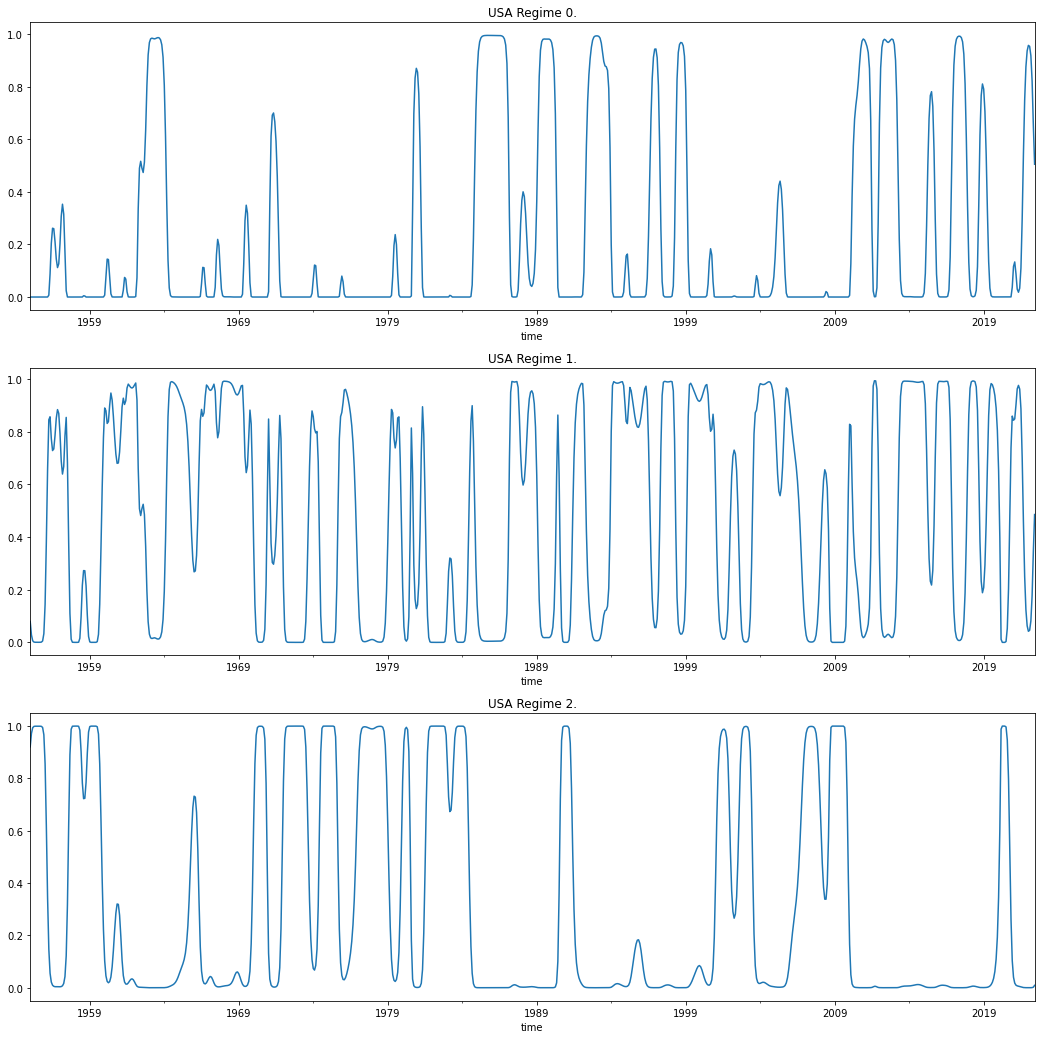

In [17]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)               
    usa_model_fit.smoothed_marginal_probabilities[i].plot(title='USA Regime {}.'.format(i), figsize=(18, 18))

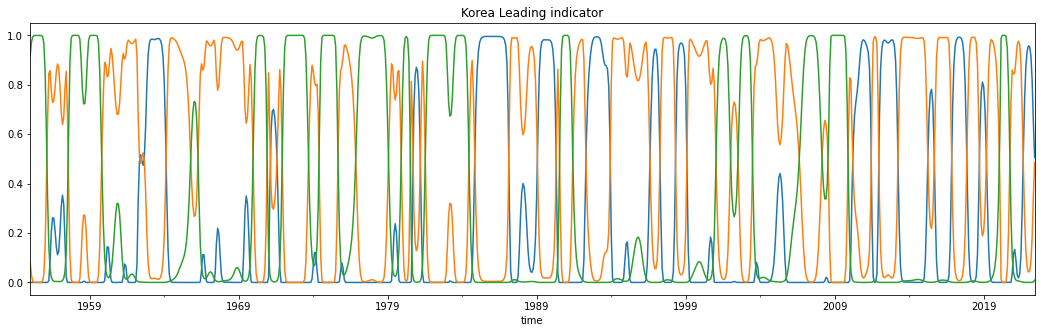

In [18]:
for i in range(N_regimes):
    usa_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Leading indicator', figsize=(18,5)) 